**Analiza povprečnih plač v Sloveniji (2008–2022)**

Ta Jupyter Notebook analizira podatke o povprečnih plačah v Sloveniji na podlagi različnih dejavnikov, kot so regija, starost in spol. Podatke smo pridobili iz OPSI (Odprti podatki Slovenije).

**Podatkovni sklop vsebuje:**
- Regije (12 regij Slovenije)
- Starostne skupine (npr. 15–24, 25–34, ...)
- Spol (moški, ženske)
- Leto (2008–2022)
- Povprečno mesečno plačo

**Cilji analize:**
1. Kako so se povprečne plače spreminjale skozi leta?
2. Kakšne so razlike v plačah med spoloma v različnih regijah?
3. Kako močno starost vpliva na plačo v posamezni regiji?

**Uvoz modulov, branje podatkov iz .px datoteke in osnovni pregled CSV datoteke:**

V tem delu smo najprej namestili in uvozili knjižnico pyaxis, ki omogoča branje .px datotek, ter knjižnico pandas za delo s tabelarčnimi podatki. Nato smo določili pot do datoteke in prebrali podatke v DataFrame. Na koncu smo podatke shranili v CSV datoteko z ustreznim kodiranjem, da bodo združljivi z orodji, kot je Excel.

Uvozili smo podatke iz ustvarjene CSV datoteke z uporabo pandas in si ogledali prvih nekaj vrstic, da preverimo strukturo in vsebino. Ta korak je ključen, saj se prepričamo, da so podatki pravilno naloženi in pripravljeni za nadaljnjo analizo.

In [2]:
from pyaxis import pyaxis
import pandas as pd

# Pot do .px datoteke
fp = r"0711322S.px"

# Uvoz v UTF-8 in slovenščina
px = pyaxis.parse(uri=fp, encoding='utf-8', lang='sl')

# Podatki v DataFrame
data_df = px['DATA']

# Kratek pregled
print(data_df.head())

# Shrani v CSV z UTF-8 BOM za združljivost (npr. z Excelom)
data_df.to_csv("placa_utf8.csv", index=False, encoding='utf-8-sig')

Multilingual PX file
  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  


**Filtriranje podatkov za analizo:**

Iz originalnega DataFrame smo filtrirali le tiste vrstice, ki so nas zanimale – podatki za starost "SKUPAJ", spol "SKUPAJ", vrsto plače "Bruto" in meritve "Povprečje". S tem zagotovimo, da analiza zajema samo ustrezne podatke, in izboljšamo preglednost nadaljnjih analiz.

**Pretvorba stolpcev v številčne vrednosti in čiščenje:**

V tem delu smo pretvorili stolpec 'LETO' in 'DATA' v numerične tipe, da zagotovimo pravilno matematično obdelavo podatkov. Prav tako smo odstranili vrstice, kjer so bile vrednosti manjkajoče (NaN), da izboljšamo natančnost naslednjih analiz, in podatke ustrezno sortirali po regiji in letu.

**Risanje grafa povprečnih plač skozi čas:**

Za vizualno primerjavo smo ustvarili črtni graf, ki prikazuje, kako so se povprečne bruto plače spreminjale skozi leta po posameznih regijah. S pomočjo iteracije skozi edinstvene regije smo vsakemu dodali svojo črto, kar omogoča direktno primerjavo trendov med regijami.

  STATISTIČNA REGIJA           STAROST           SPOL  LETO  PLAČA  \
0          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
1          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
2          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
3          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   
4          SLOVENIJA  Starost - SKUPAJ  Spol - SKUPAJ  2008  Bruto   

           MERITVE  DATA  
0        Povprečje  1427  
1          Mediana   NaN  
2  Spodnji kvartil   NaN  
3  Zgornji kvartil   NaN  
4    10. percentil   NaN  
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


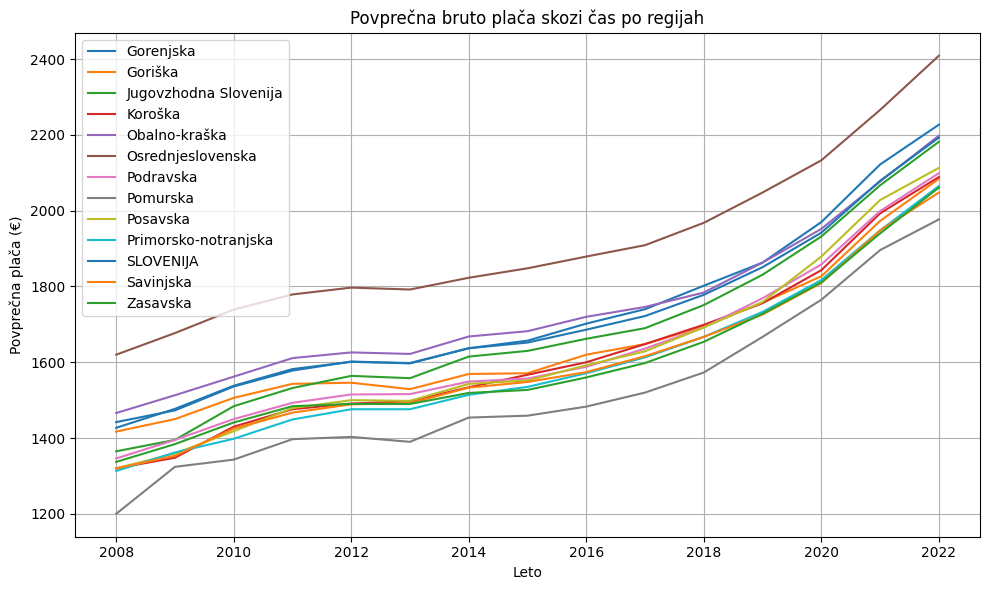

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Uvoz podatkov iz CSV datoteke
data_df = pd.read_csv("placa_utf8.csv")

# Preverimo prvih nekaj vrstic
print(data_df.head())

# Filtriramo samo relevantne stolpce
filtered_df = data_df[(data_df['STAROST'] == 'Starost - SKUPAJ') &
                       (data_df['SPOL'] == 'Spol - SKUPAJ') &
                        (data_df['PLAČA'] == 'Bruto') &
                       (data_df['MERITVE'] == 'Povprečje')]

# Preverimo, ali so v stolpcu "LETO" nenavadne vrednosti
print(filtered_df["LETO"].unique())

# Pretvorimo LETO v številke (če so v formatu, ki ni številka)
filtered_df.loc[:, "LETO"] = pd.to_numeric(filtered_df["LETO"], errors='coerce')

# Pretvorimo tudi "DATA" v število, če ni v pravilnem formatu
filtered_df.loc[:, "DATA"] = pd.to_numeric(filtered_df["DATA"], errors='coerce')

# Odstranimo vrstice, kjer je LETO ali DATA NaN
filtered_df = filtered_df.dropna(subset=["LETO", "DATA"])

# Sortiramo podatke po regiji in letu
filtered_df = filtered_df.sort_values(by=["STATISTIČNA REGIJA", "LETO"])

# Risanje grafa za bruto plače po regijah skozi čas
plt.figure(figsize=(10, 6))
for region in filtered_df["STATISTIČNA REGIJA"].unique():
    region_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == region]
    plt.plot(region_df["LETO"], region_df["DATA"], label=region)

plt.title("Povprečna bruto plača skozi čas po regijah")
plt.xlabel("Leto")
plt.ylabel("Povprečna plača (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Katera regija je imela največjo rast med 2008–2022

V tem delu smo za vsako regijo preverili vrednosti plač v začetni (2008) in končni (2022) letu. Če so podatki za obe leti na voljo, smo izračunali razliko med plačami, s čimer smo ugotovili, katera regija je imela največjo rast. Rezultat se nato izpiše, kar omogoča vpogled v medregionalne razlike v plačah.

In [4]:
growth = {}

for region in filtered_df["STATISTIČNA REGIJA"].unique():
    reg_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == region]
    reg_df = reg_df.sort_values(by="LETO")
    if not reg_df.empty and reg_df["LETO"].min() == 2008 and reg_df["LETO"].max() == 2022:
        start = reg_df[reg_df["LETO"] == 2008]["DATA"].values[0]
        end = reg_df[reg_df["LETO"] == 2022]["DATA"].values[0]
        growth[region] = end - start

# Najdi regijo z največjo rastjo
top_region = max(growth, key=growth.get)
print(f"Regija z največjo rastjo: {top_region} ({growth[top_region]:.2f} €)")


Regija z največjo rastjo: Jugovzhodna Slovenija (817.00 €)


# Povprečna plača po regiji za določeno leto

Na podlagi filtriranih podatkov za leto 2022 smo izdelali stolpični graf, ki prikazuje povprečno bruto plačo v posameznih regijah. Ta vizualizacija je uporabna za hitro primerjavo med regijami glede trenutnega stanja plač.

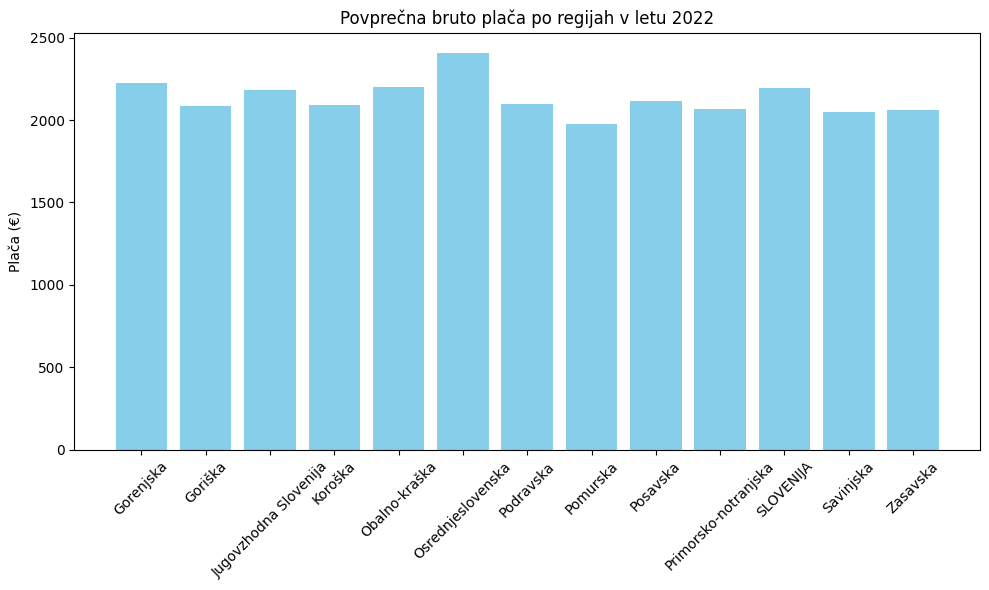

In [5]:
izbrano_leto = 2022
leto_df = filtered_df[filtered_df["LETO"] == izbrano_leto]

plt.figure(figsize=(10, 6))
plt.bar(leto_df["STATISTIČNA REGIJA"], leto_df["DATA"], color='skyblue')
plt.xticks(rotation=45)
plt.title(f"Povprečna bruto plača po regijah v letu {izbrano_leto}")
plt.ylabel("Plača (€)")
plt.tight_layout()
plt.show()


# Animacija

**Ustvarjanje animacije:**

S pomočjo knjižnice matplotlib.animation smo pripravili animacijo, ki ciklično prikazuje razvoj povprečnih plač po regijah skozi leta. Animacija posodablja graf za vsako leto posebej in omogoča bolj dinamičen pogled na spreminjanje plač skozi čas. Rezultat animacije shranimo tudi kot GIF datoteko.

C:\Users\armen\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


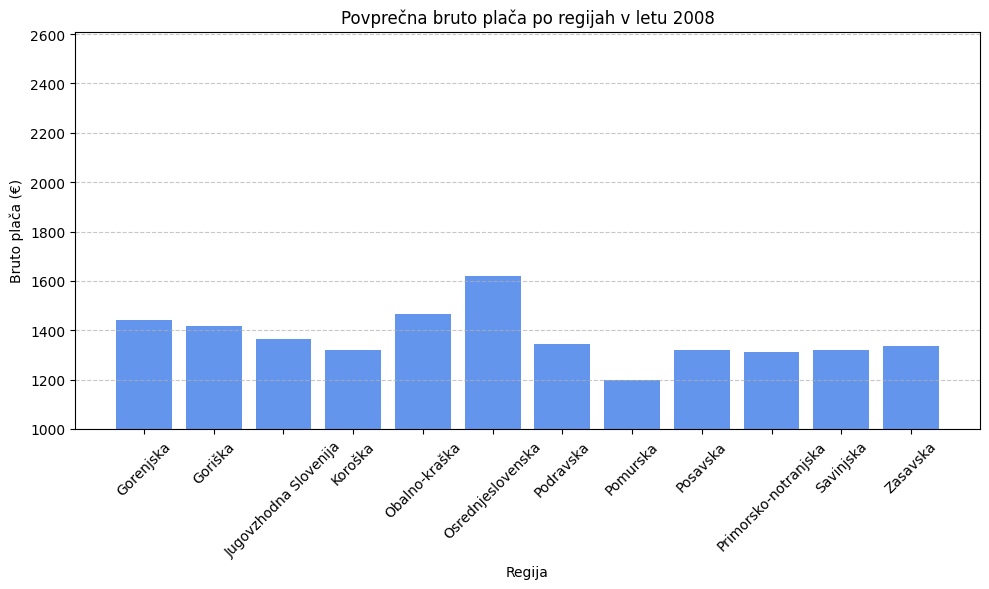

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

# Nastavi HTML prikaz animacij
rc('animation', html='jshtml')

# Uvozi podatke
filtered_df = pd.read_csv("placa_utf8.csv")

# Filtriraj podatke
filtered_df = filtered_df[(filtered_df['STAROST'] == 'Starost - SKUPAJ') &
                          (filtered_df['SPOL'] == 'Spol - SKUPAJ') &
                          (filtered_df['PLAČA'] == 'Bruto') &
                          (filtered_df['MERITVE'] == 'Povprečje') &
                          (filtered_df['STATISTIČNA REGIJA'] != 'SLOVENIJA')]

# Pretvori stolpce
filtered_df["LETO"] = pd.to_numeric(filtered_df["LETO"], errors='coerce')
filtered_df["DATA"] = pd.to_numeric(filtered_df["DATA"], errors='coerce')
filtered_df = filtered_df.dropna(subset=["LETO", "DATA"])
filtered_df = filtered_df.sort_values(by=["LETO", "STATISTIČNA REGIJA"])

# Priprava za animacijo
leta = sorted(filtered_df["LETO"].unique())

fig, ax = plt.subplots(figsize=(10, 6))

def animate(leto):
    ax.clear()
    leto_df = filtered_df[filtered_df["LETO"] == leto]
    ax.bar(leto_df["STATISTIČNA REGIJA"], leto_df["DATA"], color='cornflowerblue')
    ax.set_title(f"Povprečna bruto plača po regijah v letu {int(leto)}")
    ax.set_xlabel("Regija")
    ax.set_ylabel("Bruto plača (€)")
    ax.set_ylim(1000, filtered_df["DATA"].max() + 200)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

ani = animation.FuncAnimation(fig, animate, frames=leta, interval=1000, repeat=False)

HTML(ani.to_jshtml()) 

In [8]:
ani.save("placa_animacija.gif", writer="pillow", fps=1)

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


<Figure size 640x480 with 0 Axes>

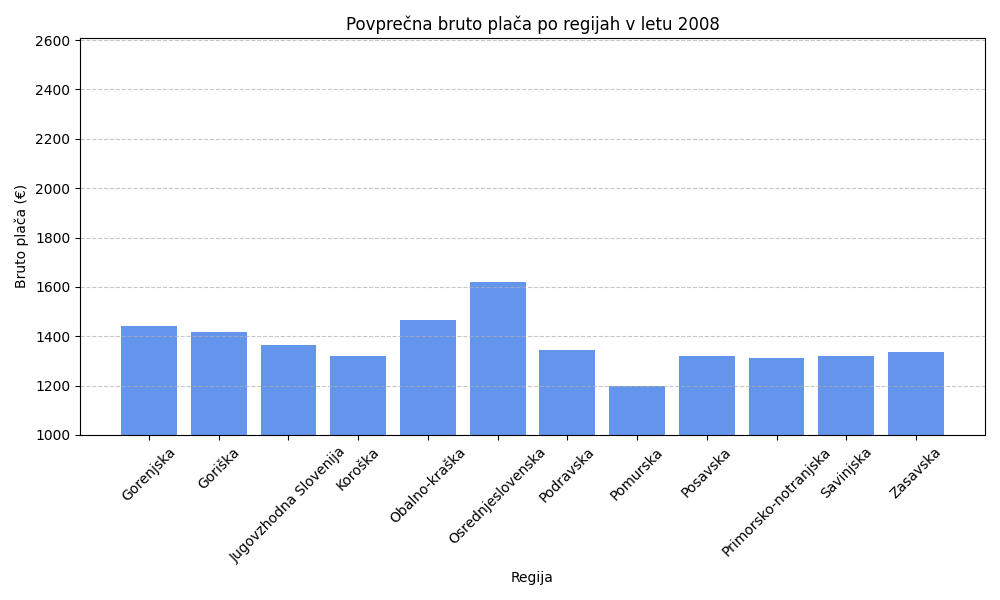

In [9]:
from IPython.display import Image
Image("placa_animacija.gif")

# Najvišja razlika med regijama 2008-2022

**Analiza najvišje razlike med regijami:**

Tukaj smo za vsako leto identificirali regijo z najvišjo in najnižjo plačo ter ustvarili pregled, kjer je navedeno, katera regija je bila na vrhu in katera na dnu. 

In [7]:
pregled = []

for leto in sorted(filtered_df["LETO"].unique()):
    leto_df = filtered_df[filtered_df["LETO"] == leto]
    
    if leto_df.empty:
        continue
    
    max_row = leto_df.loc[leto_df["DATA"].idxmax()]
    min_row = leto_df.loc[leto_df["DATA"].idxmin()]
    
    pregled.append({
        "LETO": leto,
        "NAJVIŠJA REGIJA": max_row["STATISTIČNA REGIJA"],
        "PLAČA MAX (€)": max_row["DATA"],
        "NAJNIŽJA REGIJA": min_row["STATISTIČNA REGIJA"],
        "PLAČA MIN (€)": min_row["DATA"]
    })

pregled_df = pd.DataFrame(pregled)

print(pregled_df)


    LETO    NAJVIŠJA REGIJA  PLAČA MAX (€) NAJNIŽJA REGIJA  PLAČA MIN (€)
0   2008  Osrednjeslovenska           1620        Pomurska           1200
1   2009  Osrednjeslovenska           1677        Pomurska           1324
2   2010  Osrednjeslovenska           1739        Pomurska           1343
3   2011  Osrednjeslovenska           1779        Pomurska           1397
4   2012  Osrednjeslovenska           1797        Pomurska           1403
5   2013  Osrednjeslovenska           1792        Pomurska           1390
6   2014  Osrednjeslovenska           1823        Pomurska           1454
7   2015  Osrednjeslovenska           1848        Pomurska           1459
8   2016  Osrednjeslovenska           1879        Pomurska           1483
9   2017  Osrednjeslovenska           1909        Pomurska           1520
10  2018  Osrednjeslovenska           1968        Pomurska           1573
11  2019  Osrednjeslovenska           2048        Pomurska           1667
12  2020  Osrednjeslovenska           

Zanimivo ostajata isti regiji skozi vsa leta - najvišjo povprečno bruto plačo ima vedno osrednjeslovenska regija, najslabše plačani pa so bili v Pomurski regiji.

**Izračun in vizualizacija razlike med Osrednjeslovensko in Pomursko regijo:**

Za podrobnejšo analizo smo združili podatke iz Osrednjeslovenske in Pomurske regije, nato pa izračunali razliko v plačah med obema regijama po letih. Rezultat smo vizualno prikazali s črtnim grafom, kar jasno pokaže, kako se medsebojna razlika spreminja skozi čas, pri čemer smo ugotovili, da je najvišja razlika znašala 432 € v letu 2022.

    LETO  DATA_OS  DATA_POM  RAZLIKA
0   2008     1620      1200      420
1   2009     1677      1324      353
2   2010     1739      1343      396
3   2011     1779      1397      382
4   2012     1797      1403      394
5   2013     1792      1390      402
6   2014     1823      1454      369
7   2015     1848      1459      389
8   2016     1879      1483      396
9   2017     1909      1520      389
10  2018     1968      1573      395
11  2019     2048      1667      381
12  2020     2133      1765      368
13  2021     2266      1896      370
14  2022     2409      1977      432


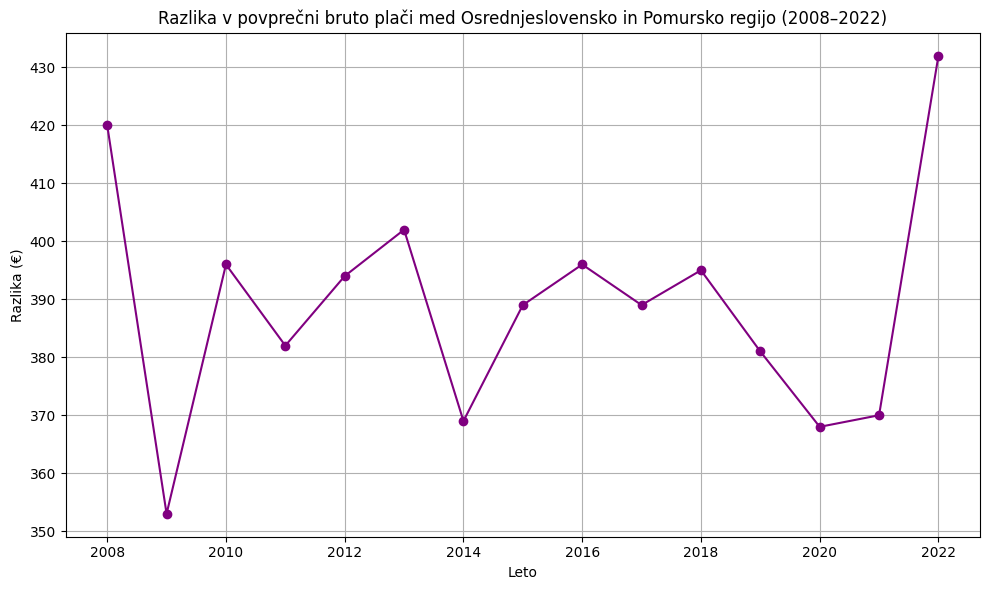

In [8]:
os_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == "Osrednjeslovenska"]
pom_df = filtered_df[filtered_df["STATISTIČNA REGIJA"] == "Pomurska"]

merged_df = pd.merge(os_df[["LETO", "DATA"]], pom_df[["LETO", "DATA"]], on="LETO", suffixes=("_OS", "_POM"))
merged_df["RAZLIKA"] = merged_df["DATA_OS"] - merged_df["DATA_POM"]

print(merged_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_df["LETO"], merged_df["RAZLIKA"], marker='o', color='purple')
plt.title("Razlika v povprečni bruto plači med Osrednjeslovensko in Pomursko regijo (2008–2022)")
plt.xlabel("Leto")
plt.ylabel("Razlika (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


Ker smo v prejšnji točki ugotovili da sta skozi leta 2008-2022 konstantno bili isti regiji na obeh ekstremih, smo v tej točki prikazali razlike med Osrednjeslovensko in Pomursko regijo. Te predstavljajo največjo razliko med povprečnimi plačami med katerimakoli regijama v tem časovnem obdobju. Vidimo, da se je najvišja razlika zgodila ravno leta 2022, ko je znašala 432€.

# Razlika med spoloma 2022

**Analiza spolne razlike v 2022:**

Na zadnjem delu smo se osredotočili na razlike med spoloma za leto 2022. Podatke smo filtrirali za "Bruto" plače, meritev "Povprečje" in ustrezne starostne skupine. S pomočjo pivot_table smo podatke preuredili tako, da smo dobili ločene stolpce za moške in ženske, nato pa izračunali absolutno in odstotno razliko med njima. Rezultate smo prikazali v obliki tabele in vizualizirali s stolpičnim grafom, kar je pomagalo razkriti, v kateri regiji je bila razlika med spoloma največja oziroma najmanjša.

       STATISTIČNA REGIJA   Moški  Ženske  RAZLIKA_SPOLI (€)  RAZLIKA (%)
0           Obalno-kraška  2292.0  2082.0              210.0         10.1
1               Gorenjska  2315.0  2118.0              197.0          9.3
2                Posavska  2193.0  2008.0              185.0          9.2
3                 Koroška  2166.0  1989.0              177.0          8.9
4                Pomurska  2050.0  1888.0              162.0          8.6
5               Podravska  2168.0  2013.0              155.0          7.7
6    Primorsko-notranjska  2131.0  1976.0              155.0          7.8
7               Savinjska  2112.0  1966.0              146.0          7.4
8                 Goriška  2147.0  2004.0              143.0          7.1
9                Zasavska  2116.0  1996.0              120.0          6.0
10      Osrednjeslovenska  2457.0  2353.0              104.0          4.4
11  Jugovzhodna Slovenija  2218.0  2136.0               82.0          3.8


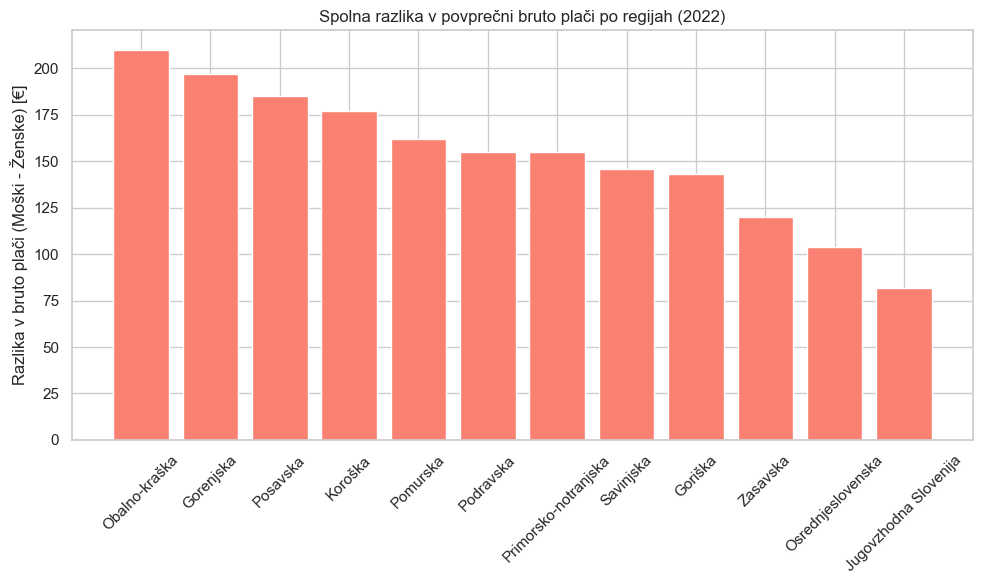

In [34]:
spol_2022_df = data_df[
    (data_df["LETO"] == 2022) &
    (data_df["PLAČA"] == "Bruto") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (data_df["MERITVE"] == "Povprečje") &
    (data_df["SPOL"].isin(["Moški", "Ženske"])) &
    (data_df["STAROST"] == "Starost - SKUPAJ")
].copy()

spol_2022_df["DATA"] = pd.to_numeric(spol_2022_df["DATA"], errors="coerce")

pivot_2022 = spol_2022_df.pivot_table(
    index="STATISTIČNA REGIJA",
    columns="SPOL",
    values="DATA"
).reset_index()

pivot_2022.columns.name = None

pivot_2022["RAZLIKA_SPOLI (€)"] = pivot_2022["Moški"] - pivot_2022["Ženske"]
pivot_2022["RAZLIKA (%)"] = ((pivot_2022["Moški"] - pivot_2022["Ženske"]) / pivot_2022["Ženske"]) * 100
pivot_2022["RAZLIKA (%)"] = pivot_2022["RAZLIKA (%)"].round(1)

pivot_2022 = pivot_2022.sort_values(by="RAZLIKA_SPOLI (€)", ascending=False)

print(pivot_2022.reset_index(drop=True)[["STATISTIČNA REGIJA", "Moški", "Ženske", "RAZLIKA_SPOLI (€)", "RAZLIKA (%)"]])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(pivot_2022["STATISTIČNA REGIJA"], pivot_2022["RAZLIKA_SPOLI (€)"], color='salmon')
plt.xticks(rotation=45)
plt.ylabel("Razlika v bruto plači (Moški - Ženske) [€]")
plt.title("Spolna razlika v povprečni bruto plači po regijah (2022)")
plt.tight_layout()
plt.show()


Evidentno je, da je bila leta 2022 največja razlika med spoloma v Obalno-Kraški regiji, najmanjša pa v Jugovzhodni regiji, ki je zanimivo hkrati tudi regija z največjo rastjo bruto plač med letoma 2008 in 2022, kot smo ugotovili v eni od prejšnjih točk.

    LETO        Moški       Ženske  RAZLIKA_SPOLI (€)  RAZLIKA (%)
0   2008  1423.916667  1305.666667         118.250000         9.06
1   2009  1442.500000  1390.000000          52.500000         3.78
2   2010  1504.833333  1443.833333          61.000000         4.22
3   2011  1560.000000  1481.083333          78.916667         5.33
4   2012  1581.666667  1493.500000          88.166667         5.90
5   2013  1579.916667  1489.000000          90.916667         6.11
6   2014  1624.250000  1526.416667          97.833333         6.41
7   2015  1642.666667  1535.166667         107.500000         7.00
8   2016  1680.333333  1567.750000         112.583333         7.18
9   2017  1721.166667  1599.083333         122.083333         7.63
10  2018  1785.333333  1641.166667         144.166667         8.78
11  2019  1847.500000  1722.083333         125.416667         7.28
12  2020  1928.166667  1826.750000         101.416667         5.55
13  2021  2064.000000  1968.916667          95.083333         

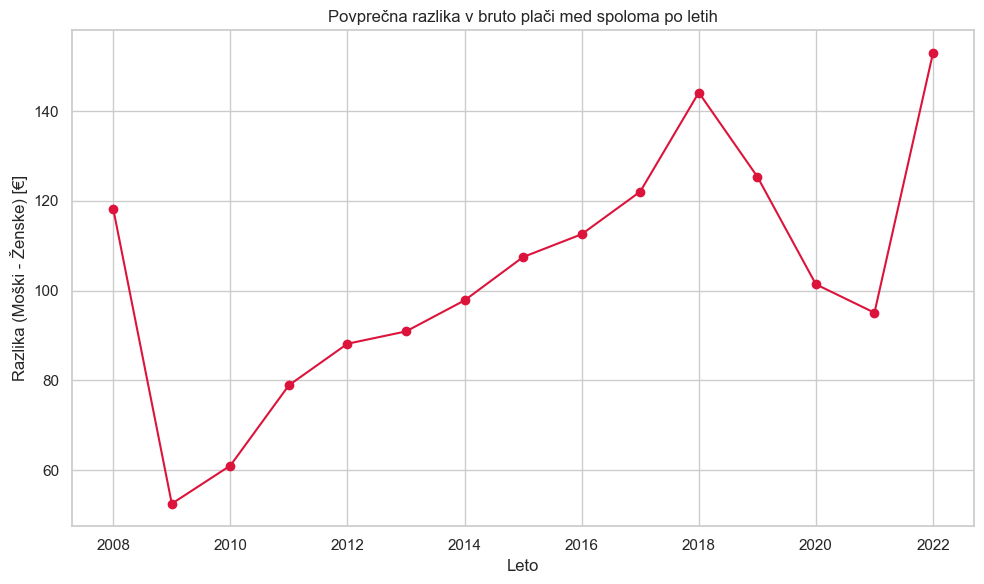

In [35]:
# Filtriraj ustrezne podatke za vse leta
spol_leta_df = data_df[
    (data_df["PLAČA"] == "Bruto") &
    (data_df["MERITVE"] == "Povprečje") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (data_df["SPOL"].isin(["Moški", "Ženske"])) &
    (data_df["STAROST"] == "Starost - SKUPAJ")
].copy()

# Pretvori v numerično
spol_leta_df["DATA"] = pd.to_numeric(spol_leta_df["DATA"], errors="coerce")

# Pivot po LETO in SPOL (vse regije povprečje)
pivot_leta = spol_leta_df.pivot_table(
    index=["LETO", "SPOL"],
    values="DATA",
    aggfunc="mean"  # povprečje čez vse regije
).reset_index()

# Pretvori v obliko: LETO | Moški | Ženske
pivot_wide = pivot_leta.pivot(index="LETO", columns="SPOL", values="DATA").reset_index()
pivot_wide.columns.name = None

# Izračunaj razliko
pivot_wide["RAZLIKA_SPOLI (€)"] = pivot_wide["Moški"] - pivot_wide["Ženske"]
pivot_wide["RAZLIKA (%)"] = ((pivot_wide["Moški"] - pivot_wide["Ženske"]) / pivot_wide["Ženske"]) * 100
pivot_wide["RAZLIKA (%)"] = pivot_wide["RAZLIKA (%)"].round(2)

# --- Rezultati ---
print(pivot_wide)

# --- Največja in najmanjša razlika ---
max_diff = pivot_wide.loc[pivot_wide["RAZLIKA_SPOLI (€)"].idxmax()]
min_diff = pivot_wide.loc[pivot_wide["RAZLIKA_SPOLI (€)"].idxmin()]

print(f"\n📈 Največja razlika: {max_diff['RAZLIKA_SPOLI (€)']:.2f} € v letu {int(max_diff['LETO'])}")
print(f"📉 Najmanjša razlika: {min_diff['RAZLIKA_SPOLI (€)']:.2f} € v letu {int(min_diff['LETO'])}")

# --- Vizualizacija ---
plt.figure(figsize=(10, 6))
plt.plot(pivot_wide["LETO"], pivot_wide["RAZLIKA_SPOLI (€)"], marker='o', color='crimson')
plt.title("Povprečna razlika v bruto plači med spoloma po letih")
plt.xlabel("Leto")
plt.ylabel("Razlika (Moški - Ženske) [€]")
plt.grid(True)
plt.tight_layout()
plt.show()


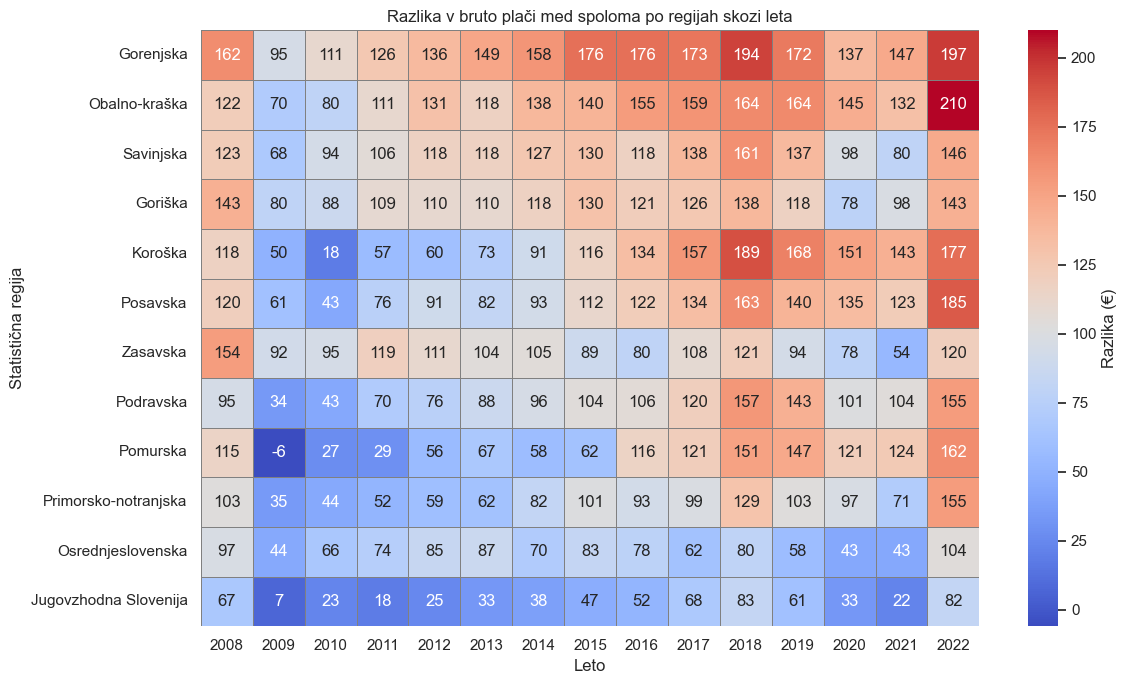

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uvozi podatke
df = pd.read_csv("placa_utf8.csv")

# Filtriraj podatke
spol_df = df[
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (df["SPOL"].isin(["Moški", "Ženske"])) &
    (df["STAROST"] == "Starost - SKUPAJ")
].copy()

# Pretvori podatke v številke
spol_df["DATA"] = pd.to_numeric(spol_df["DATA"], errors="coerce")

# Pivot po spolu za vsako leto in regijo
pivot_spol = spol_df.pivot_table(
    index=["LETO", "STATISTIČNA REGIJA"],
    columns="SPOL",
    values="DATA"
).reset_index()

# Izračunaj razliko
pivot_spol["RAZLIKA (€)"] = pivot_spol["Moški"] - pivot_spol["Ženske"]
pivot_spol["RAZLIKA (%)"] = ((pivot_spol["Moški"] - pivot_spol["Ženske"]) / pivot_spol["Ženske"]) * 100
pivot_spol["RAZLIKA (%)"] = pivot_spol["RAZLIKA (%)"].round(1)

# ----------------------------------
# BOLJŠI GRAF: Heatmap (Toplotni zemljevid)
# ----------------------------------

# Pripravi podatke za heatmap
heatmap_df = pivot_spol.pivot(index="STATISTIČNA REGIJA", columns="LETO", values="RAZLIKA (€)")

# Uredi regije po povprečni razliki
heatmap_df = heatmap_df.loc[heatmap_df.mean(axis=1).sort_values(ascending=False).index]

# Nariši heatmapo
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_df, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, linecolor="gray", cbar_kws={'label': 'Razlika (€)'})
plt.title("Razlika v bruto plači med spoloma po regijah skozi leta")
plt.xlabel("Leto")
plt.ylabel("Statistična regija")
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Naloži podatke
data_df = pd.read_csv("placa_utf8.csv")

# Filtiraj samo pomembne podatke
spol_df = data_df[
    (data_df["PLAČA"] == "Bruto") &
    (data_df["MERITVE"] == "Povprečje") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (data_df["SPOL"].isin(["Moški", "Ženske"])) &
    (data_df["STAROST"] == "Starost - SKUPAJ")
].copy()

# Pretvori vrednosti v številke
spol_df["DATA"] = pd.to_numeric(spol_df["DATA"], errors="coerce")

# Ustvari pivotno tabelo: leto, regija, spol → plača
pivot_df = spol_df.pivot_table(
    index=["LETO", "STATISTIČNA REGIJA"],
    columns="SPOL",
    values="DATA"
).reset_index()

# Izračunaj razliko
pivot_df["RAZLIKA (€)"] = pivot_df["Moški"] - pivot_df["Ženske"]
pivot_df["RAZLIKA (%)"] = ((pivot_df["Moški"] - pivot_df["Ženske"]) / pivot_df["Ženske"]) * 100
pivot_df["RAZLIKA (%)"] = pivot_df["RAZLIKA (%)"].round(1)

najvecja = pivot_df.loc[pivot_df["RAZLIKA (€)"].idxmax()]
najmanjsa = pivot_df.loc[pivot_df["RAZLIKA (€)"].idxmin()]

print("🔺 Največja razlika:")
print(najvecja)

print("\n🔻 Najmanjša razlika:")
print(najmanjsa)
print("Ženske na Pomurskem, leta 2009, so imele večjo povprečno bruto plačo.")

🔺 Največja razlika:
SPOL
LETO                           2022
STATISTIČNA REGIJA    Obalno-kraška
Moški                        2292.0
Ženske                       2082.0
RAZLIKA (€)                   210.0
RAZLIKA (%)                    10.1
Name: 172, dtype: object

🔻 Najmanjša razlika:
SPOL
LETO                      2009
STATISTIČNA REGIJA    Pomurska
Moški                   1321.0
Ženske                  1327.0
RAZLIKA (€)               -6.0
RAZLIKA (%)               -0.5
Name: 19, dtype: object
Ženske na Pomurskem, leta 2009, so imele večjo povprečno bruto plačo.


# Povprečne bruto plače po starosti

             STAROST  DATA
1664       15-24 let  1511
2384       25-34 let  1888
3104       35-44 let  2190
3824       45-54 let  2328
4544       55-64 let  2329
5264  65 let ali več  3151


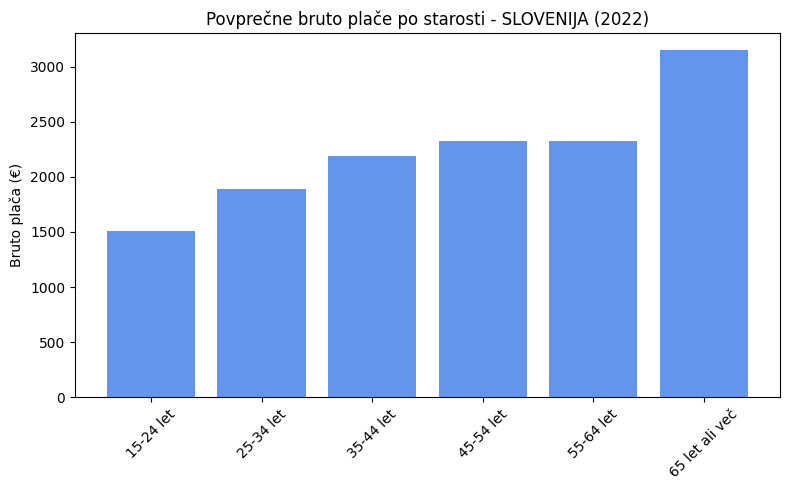

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Uvozi podatke
df = pd.read_csv("placa_utf8.csv")

# Filtriraj: leto 2022, bruto, povprečje, spol skupaj, regija SLOVENIJA
slovenija_df = df[
    (df["LETO"] == 2022) &
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (df["SPOL"] == "Spol - SKUPAJ") &
    (df["STATISTIČNA REGIJA"] == "SLOVENIJA") &
    (df["STAROST"].isin(["15-24 let", "25-34 let", "35-44 let", "45-54 let", "55-64 let", "65 let ali več"]))
].copy()

# Pretvori podatke v številke
slovenija_df["DATA"] = pd.to_numeric(slovenija_df["DATA"], errors="coerce")

# Izpis podatkov za vsako starostno skupino
print(slovenija_df[["STAROST", "DATA"]])

# Nariši stolpčni graf
plt.figure(figsize=(8, 5))
plt.bar(slovenija_df["STAROST"], slovenija_df["DATA"], color='cornflowerblue')
plt.title("Povprečne bruto plače po starosti - SLOVENIJA (2022)")
plt.ylabel("Bruto plača (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


STAROST  15-24 let  25-34 let  35-44 let  45-54 let  55-64 let  65 let ali več
LETO                                                                          
2008         901.0     1255.0     1455.0     1489.0     1796.0          3880.0
2009         910.0     1278.0     1511.0     1552.0     1860.0          4085.0
2010         972.0     1328.0     1571.0     1611.0     1944.0          4026.0
2011        1022.0     1356.0     1614.0     1650.0     1959.0          3917.0
2012        1037.0     1366.0     1638.0     1666.0     1959.0          3899.0
2013        1047.0     1356.0     1633.0     1658.0     1896.0          3747.0
2014        1077.0     1379.0     1669.0     1700.0     1893.0          3537.0
2015        1096.0     1385.0     1683.0     1713.0     1890.0          3574.0
2016        1113.0     1404.0     1712.0     1756.0     1902.0          3462.0
2017        1144.0     1437.0     1742.0     1800.0     1918.0          3317.0
2018        1198.0     1500.0     1798.0     1866.0 

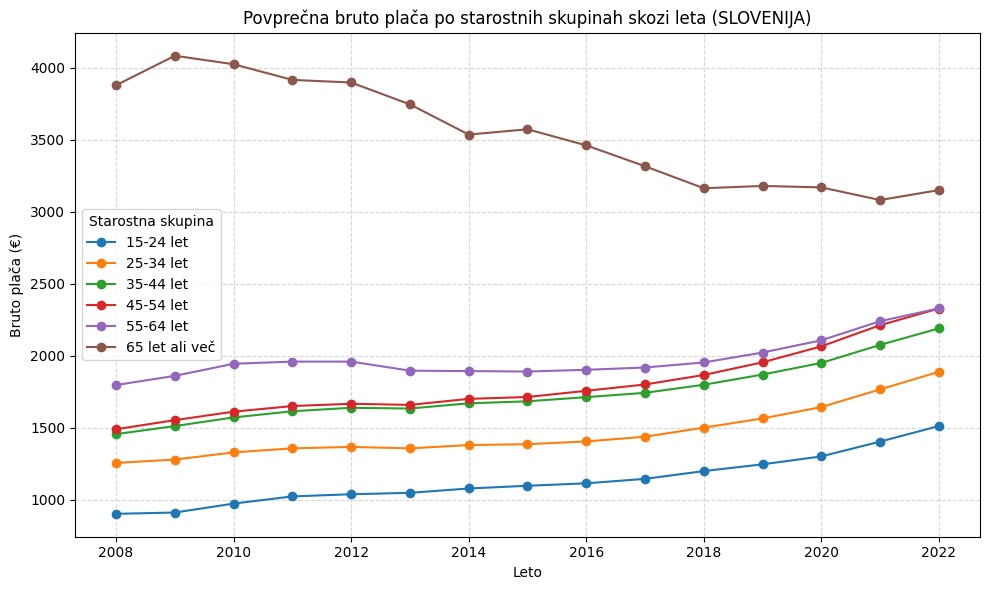

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Naloži podatke
df = pd.read_csv("placa_utf8.csv")

# Starostne skupine, ki jih želimo
starostne_skupine = [
    "15-24 let", "25-34 let", "35-44 let",
    "45-54 let", "55-64 let", "65 let ali več"
]

# Filtriraj podatke: Bruto, Povprečje, Spol - SKUPAJ, celotna Slovenija
starost_df = df[
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (df["SPOL"] == "Spol - SKUPAJ") &
    (df["STATISTIČNA REGIJA"] == "SLOVENIJA") &
    (df["STAROST"].isin(starostne_skupine))
].copy()

# Pretvori vrednosti v številke
starost_df["DATA"] = pd.to_numeric(starost_df["DATA"], errors="coerce")

# Pivot: Leta v indeksu, starostne skupine v stolpcih
pivot_starost = starost_df.pivot_table(
    index="LETO",
    columns="STAROST",
    values="DATA"
).sort_index()

# Izpis podatkov
print(pivot_starost)

# Nariši graf: kako se plače po starostnih skupinah spreminjajo skozi čas
plt.figure(figsize=(10, 6))
for skupina in starostne_skupine:
    plt.plot(pivot_starost.index, pivot_starost[skupina], marker="o", label=skupina)

plt.title("Povprečna bruto plača po starostnih skupinah skozi leta (SLOVENIJA)")
plt.xlabel("Leto")
plt.ylabel("Bruto plača (€)")
plt.legend(title="Starostna skupina")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


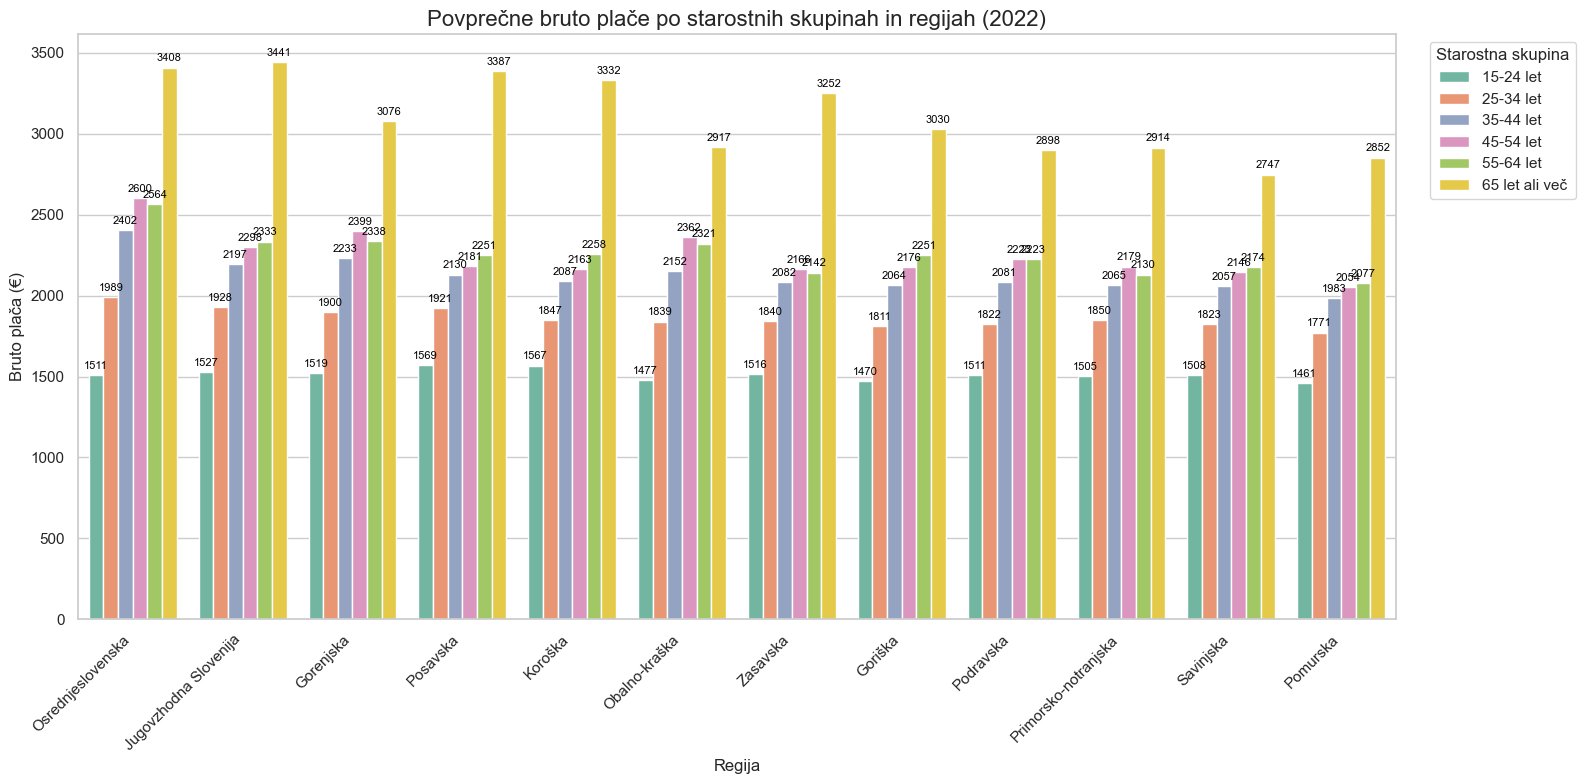

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uvozi podatke
df = pd.read_csv("placa_utf8.csv")

# Filtriraj podatke
starost_df = df[
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (df["SPOL"] == "Spol - SKUPAJ") &
    (df["STAROST"].isin(["15-24 let", "25-34 let", "35-44 let", "45-54 let", "55-64 let", "65 let ali več"])) &
    (df["LETO"] == 2022)
].copy()

# Pretvori v številke
starost_df["DATA"] = pd.to_numeric(starost_df["DATA"], errors="coerce")

# Nastavi vrstni red starostnih skupin
starost_order = ["15-24 let", "25-34 let", "35-44 let", "45-54 let", "55-64 let", "65 let ali več"]
starost_df["STAROST"] = pd.Categorical(starost_df["STAROST"], categories=starost_order, ordered=True)

# Povprečje za sortiranje regij (da graf ni kaotičen)
regija_avg = starost_df.groupby("STATISTIČNA REGIJA")["DATA"].mean().sort_values(ascending=False)
starost_df["STATISTIČNA REGIJA"] = pd.Categorical(starost_df["STATISTIČNA REGIJA"], categories=regija_avg.index, ordered=True)

# Ustvari graf
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

barplot = sns.barplot(
    data=starost_df,
    x="STATISTIČNA REGIJA",
    y="DATA",
    hue="STAROST",
    palette="Set2"
)

# Dodaj vrednosti na stolpce
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 3),
                         textcoords='offset points')

# Naslov, oznake in legenda
plt.title("Povprečne bruto plače po starostnih skupinah in regijah (2022)", fontsize=16)
plt.ylabel("Bruto plača (€)")
plt.xlabel("Regija")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Starostna skupina", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


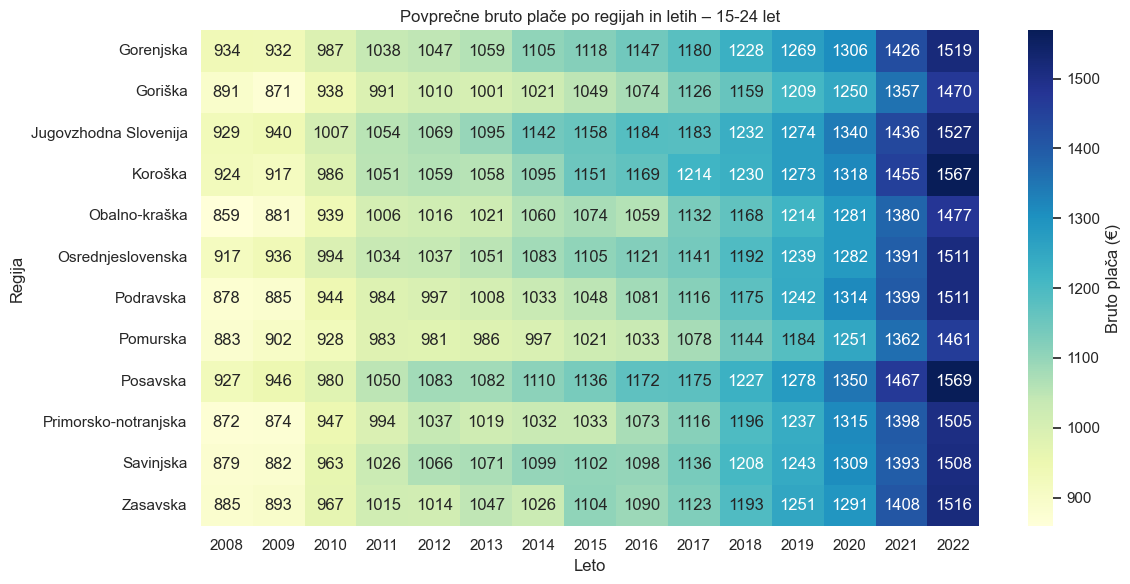

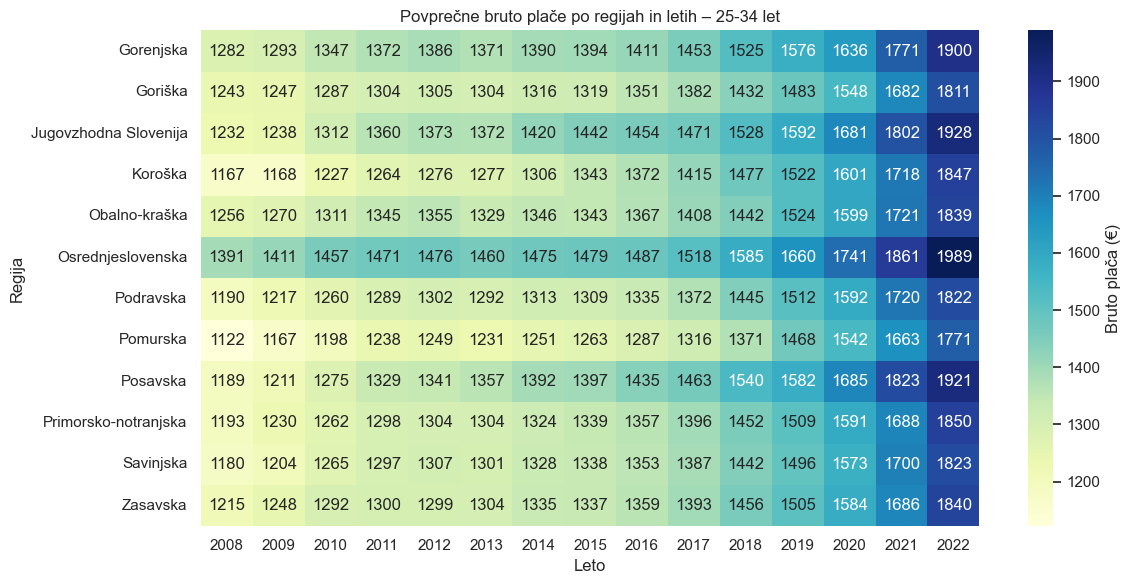

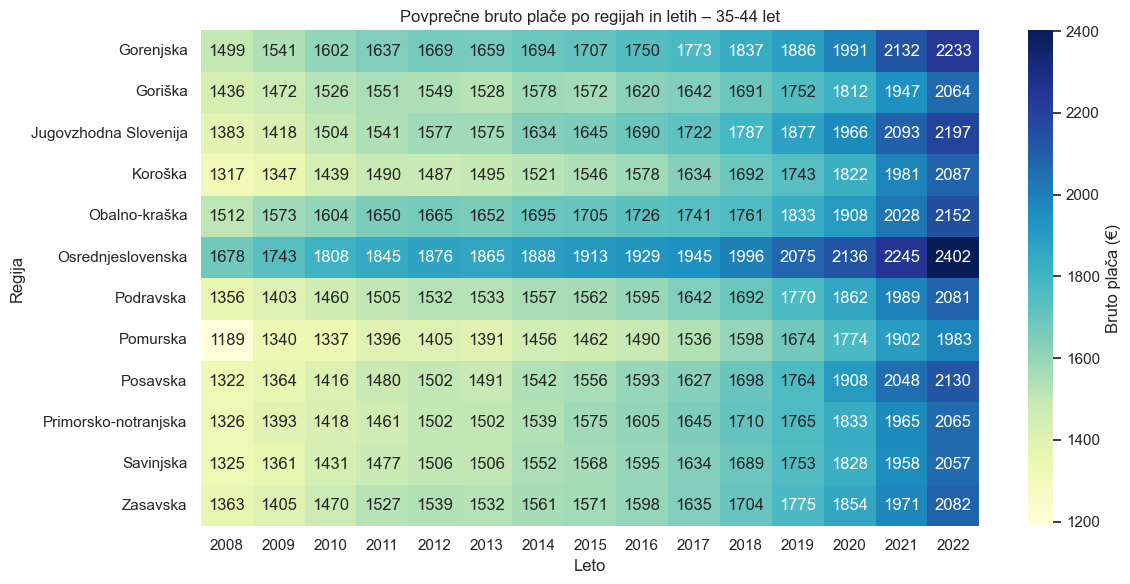

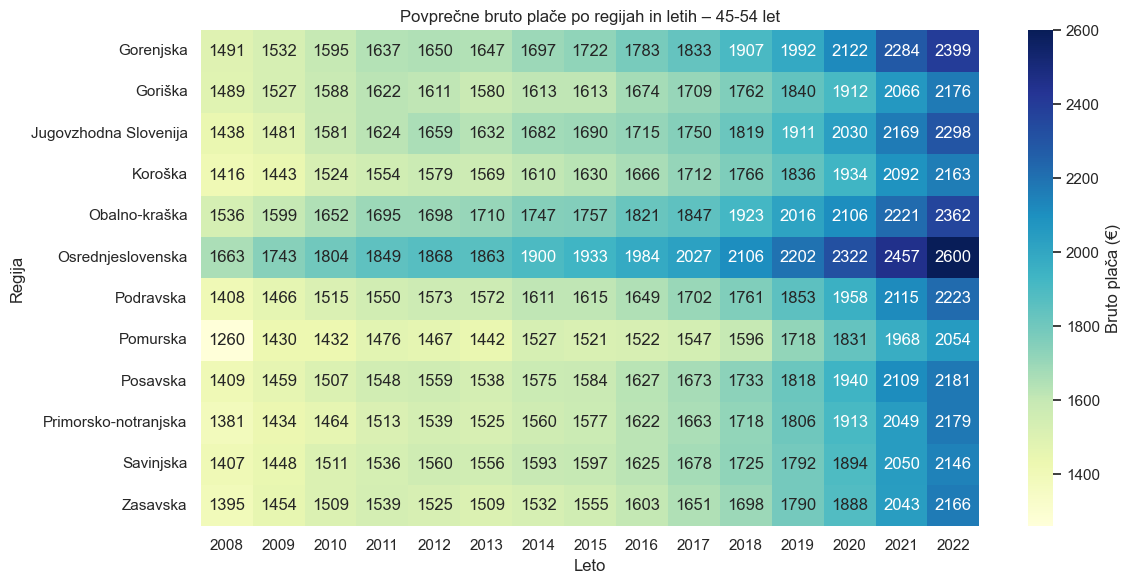

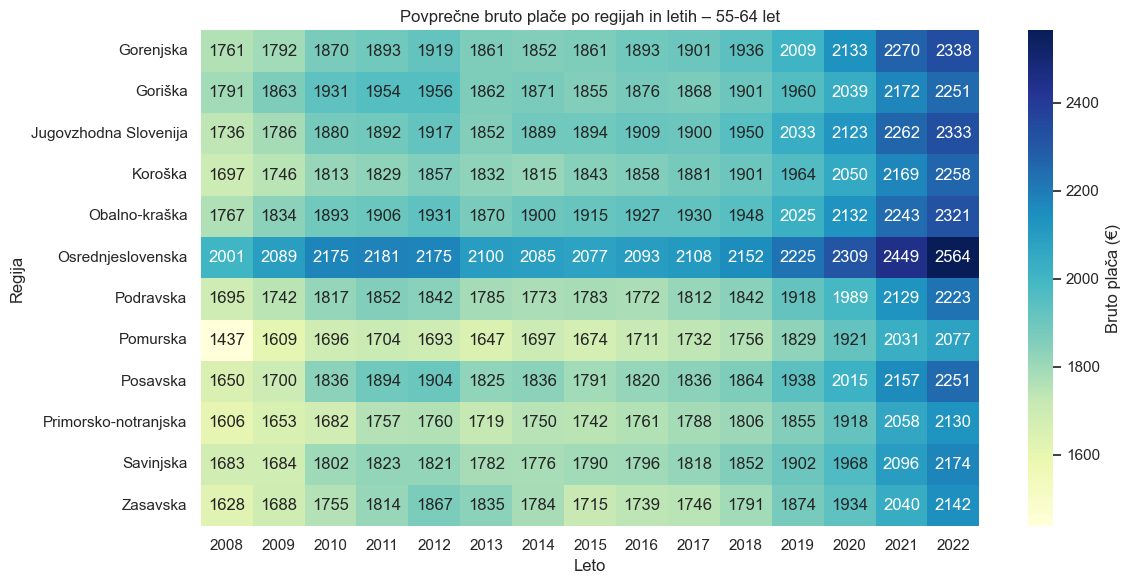

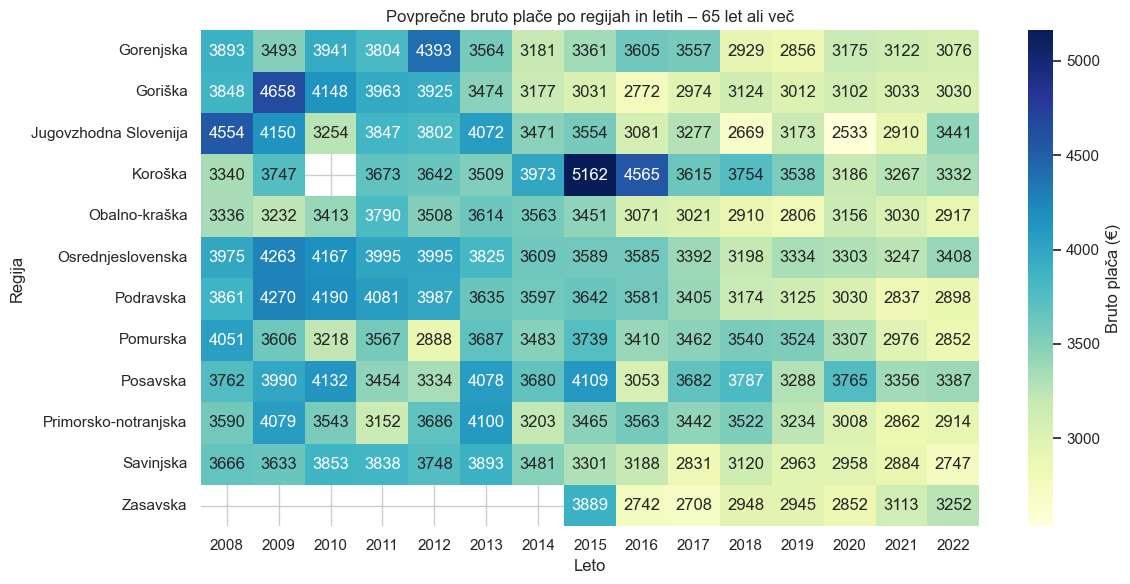

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uvozi podatke
df = pd.read_csv("placa_utf8.csv")

# Filtriraj relevantne podatke
df_filtered = df[
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (data_df['STATISTIČNA REGIJA'] != 'SLOVENIJA') &
    (df["SPOL"] == "Spol - SKUPAJ") &
    (df["STAROST"].isin([
        "15-24 let", "25-34 let", "35-44 let",
        "45-54 let", "55-64 let", "65 let ali več"
    ]))
].copy()

# Pretvori plačo v numerično vrednost
df_filtered["DATA"] = pd.to_numeric(df_filtered["DATA"], errors="coerce")

# Seznam starostnih skupin
starostne_skupine = df_filtered["STAROST"].unique()

# Risanje heatmap za vsako starostno skupino
for starost in starostne_skupine:
    pivot = df_filtered[df_filtered["STAROST"] == starost].pivot_table(
        index="STATISTIČNA REGIJA", columns="LETO", values="DATA"
    )

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Bruto plača (€)'})
    plt.title(f"Povprečne bruto plače po regijah in letih – {starost}")
    plt.xlabel("Leto")
    plt.ylabel("Regija")
    plt.tight_layout()
    plt.show()


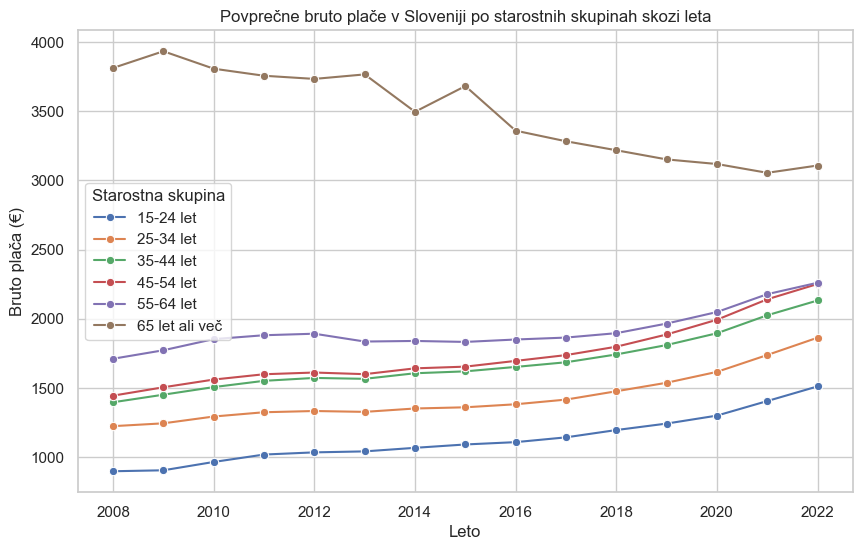

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df[
    (df["PLAČA"] == "Bruto") &
    (df["MERITVE"] == "Povprečje") &
    (df["SPOL"] == "Spol - SKUPAJ") &
    (df["STAROST"].isin([
        "15-24 let", "25-34 let", "35-44 let",
        "45-54 let", "55-64 let", "65 let ali več"
    ]))
].copy()

df_filtered["DATA"] = pd.to_numeric(df_filtered["DATA"], errors="coerce")

# Povprečje po letu in starosti (celotna Slovenija)
avg_slovenija = df_filtered.groupby(["LETO", "STAROST"])["DATA"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_slovenija, x="LETO", y="DATA", hue="STAROST", marker="o")
plt.title("Povprečne bruto plače v Sloveniji po starostnih skupinah skozi leta")
plt.ylabel("Bruto plača (€)")
plt.xlabel("Leto")
plt.legend(title="Starostna skupina")
plt.grid(True)
plt.show()
